In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

DESCRIPTION

Identify the level of income qualification needed for the families in Latin America.

Problem Statement Scenario:
Many social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of the population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to
classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB)believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.

In [7]:
import PyPDF2

In [13]:
from PyPDF2 import PdfFileReader
pdf_path=r"C:\Users\RajeshS\OneDrive\Desktop\1561982588_incomequalificationprojectdescription.pdf"
with open(pdf_path, 'rb') as f:
        pdf = PdfFileReader(f)
        information = pdf.getDocumentInfo()
        number_of_pages = pdf.getNumPages()
        print(information)

{'/Producer': 'Skia/PDF m77'}


In [14]:
pdfFileObject = open(pdf_path, 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObject)
text=''
for i in range(0,pdfReader.numPages):
    # creating a page object
    pageObj = pdfReader.getPage(i)
    # extracting text from page
    text=text+pageObj.extractText()
print(text)

1.
ID = Unique ID
 
2.
v2a1, Monthly rent payment
 
3.
hacdor, =1 Overcrowding by bedrooms
 
4.
rooms,  number of all rooms in the house
 
5.
hacapo, =1 Overcrowding by rooms
 
6.
v14a, =1 has bathroom in the household
 
7.
refrig, =1 if the household has a refrigerator
 
8.
v18q, owns a tablet
 
9.
v18q1, number of tablets household owns
 
10.
r4h1, Males younger than 12 years of age
 
11.
r4h2, Males 12 years of age and older
 
12.
r4h3, Total males in the household
 
13.
r4m1, Females younger than 12 years of age
 
14.
r4m2, Females 12 years of age and older
 
15.
r4m3, Total females in the household
 
16.
r4t1, persons younger than 12 years of age
 
17.
r4t2, persons 12 years of age and older
 
18.
r4t3, Total persons in the household
 
19.
tamhog, size of the household
 
20.
tamviv, number of persons living in the household
 
21.
escolari, years of schooling
 
22.
rez_esc, Years behind in school
 
23.
hhsize, household size
 
24.
paredblolad, =1 if predominant material on the outs

# Following actions should be performed:
Identify the output variable.

Understand the type of data.

Check if there are any biases in your dataset.

Check whether all members of the house have the same poverty level.

Check if there is a house without a family head.

Set poverty level of the members and the head of the house within a family.

Count how many null values are existing in columns.

Remove null value rows of the target variable.

Predict the accuracy using random forest classifier.

Check the accuracy using random forest with cross validation.

In [15]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [16]:
df_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [20]:
df_test

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.2500,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.2500,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.2500,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.0000,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,ID_a065a7cad,NaN,1,2,1,1,1,0,NaN,0,...,10,9,100,36,25,4,36.00,0.25,33.0625,100
23852,ID_1a7c6953b,NaN,0,3,0,1,1,0,NaN,0,...,54,36,2916,16,36,4,4.00,1.00,36.0000,2916
23853,ID_07dbb4be2,NaN,0,3,0,1,1,0,NaN,0,...,12,16,144,16,36,4,4.00,1.00,36.0000,144
23854,ID_34d2ed046,NaN,0,3,0,1,1,0,NaN,0,...,12,25,144,16,36,4,4.00,1.00,36.0000,144


### Target
Output variable is Target

1 = extreme poverty
2 = moderate poverty
3 = vulnerable households
4 = non vulnerable households

In [19]:
print('train shape: ',df_train.shape)
print('test shape: ',df_test.shape)

train shape:  (9557, 143)
test shape:  (23856, 142)


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [33]:
((df_train.isnull().sum()/df_test.shape[0])*100).sort_values(ascending=False)

rez_esc            33.232730
v18q1              30.776325
v2a1               28.755869
SQBmeaned           0.020959
meaneduc            0.020959
                     ...    
abastaguadentro     0.000000
cielorazo           0.000000
techootro           0.000000
techocane           0.000000
Target              0.000000
Length: 143, dtype: float64

In [32]:
((df_test.isnull().sum()/df_test.shape[0])*100).sort_values(ascending=False)

rez_esc            82.381791
v18q1              75.980885
v2a1               72.950201
meaneduc            0.129946
SQBmeaned           0.129946
                     ...    
abastaguadentro     0.000000
cielorazo           0.000000
techootro           0.000000
techocane           0.000000
agesq               0.000000
Length: 142, dtype: float64

In [41]:
print('Inte-64')
print(df_train.select_dtypes(np.int64).columns)
print('--------')
print('Float-64')
print(df_train.select_dtypes(np.float64).columns)
print('--------')
print('Object')
print(df_train.select_dtypes(np.object_).columns)


Inte-64
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
       'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'],
      dtype='object', length=130)
--------
Float-64
Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')
--------
Object
Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


In [44]:
int_null_count=df_train.select_dtypes(np.int64).isnull().sum()
float_null_count=df_train.select_dtypes(np.float64).isnull().sum()
obj_null_count=df_train.select_dtypes(np.object).isnull().sum()

In [52]:
print(int_null_count[int_null_count>0])
print('--------')
print('Float-64')
print(float_null_count[float_null_count>0])
print('--------')
print('Object')
print(obj_null_count[obj_null_count>0])


Series([], dtype: int64)
--------
Float-64
v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64
--------
Object
Series([], dtype: int64)


In [55]:
print('Inte-64')
print(df_train.select_dtypes(np.int64).head())
print('--------')
print('Float-64')
print(df_train.select_dtypes(np.float64).head())
print('--------')
print('Object')
print(df_train.select_dtypes(np.object_).head())


Inte-64
   hacdor  rooms  hacapo  v14a  refrig  v18q  r4h1  r4h2  r4h3  r4m1  ...  \
0       0      3       0     1       1     0     0     1     1     0  ...   
1       0      4       0     1       1     1     0     1     1     0  ...   
2       0      8       0     1       1     0     0     0     0     0  ...   
3       0      5       0     1       1     1     0     2     2     1  ...   
4       0      5       0     1       1     1     0     2     2     1  ...   

   area1  area2  age  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  \
0      1      0   43          100    1849               1        100   
1      1      0   67          144    4489               1        144   
2      1      0   92          121    8464               1          0   
3      1      0   17           81     289              16        121   
4      1      0   37          121    1369              16        121   

   SQBhogar_nin  agesq  Target  
0             0   1849       4  
1             0   4489       4

Null values are not present in int columns

folat columns-v2a1,v18q1,rez_esc,meaneduc,SQBmeaned have missing values

object columns-dependency,edjefe,edjefa have mixed values

<AxesSubplot:>

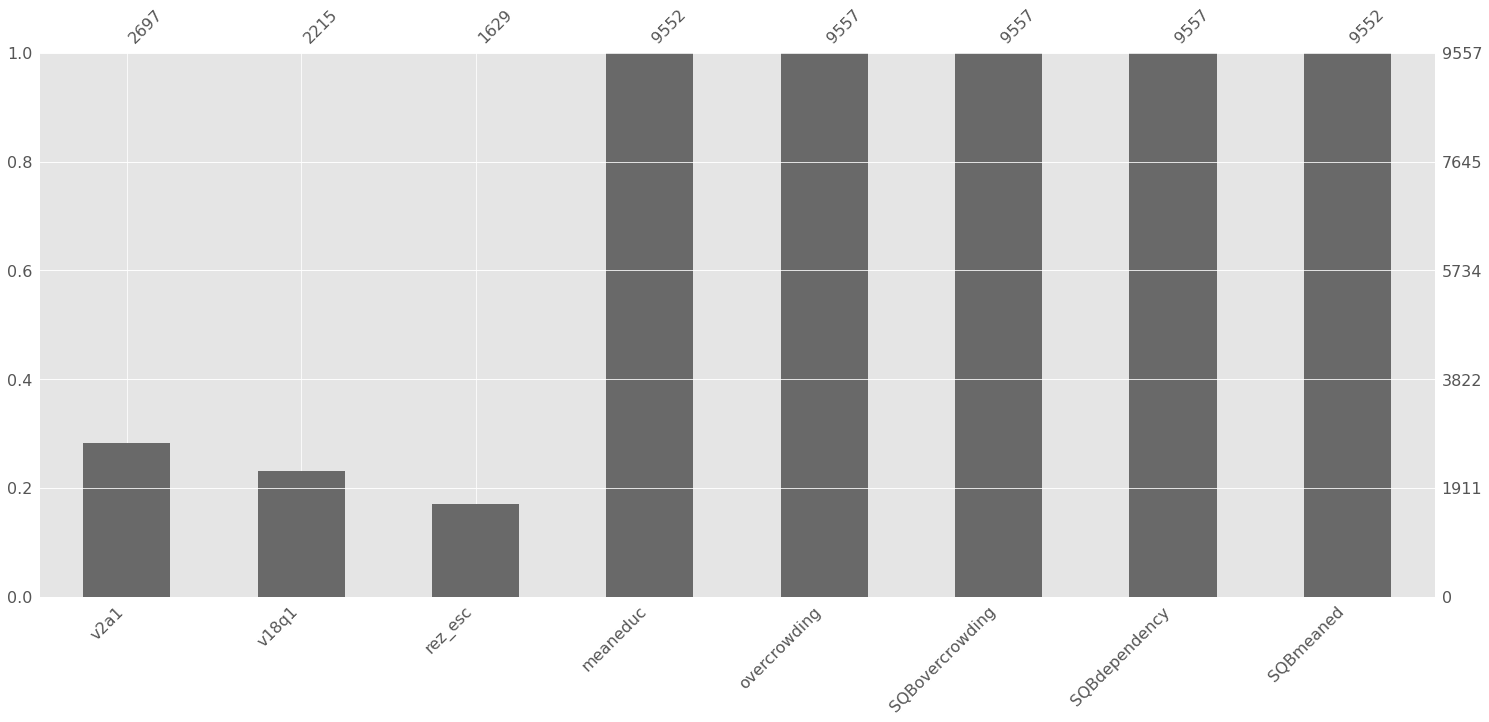

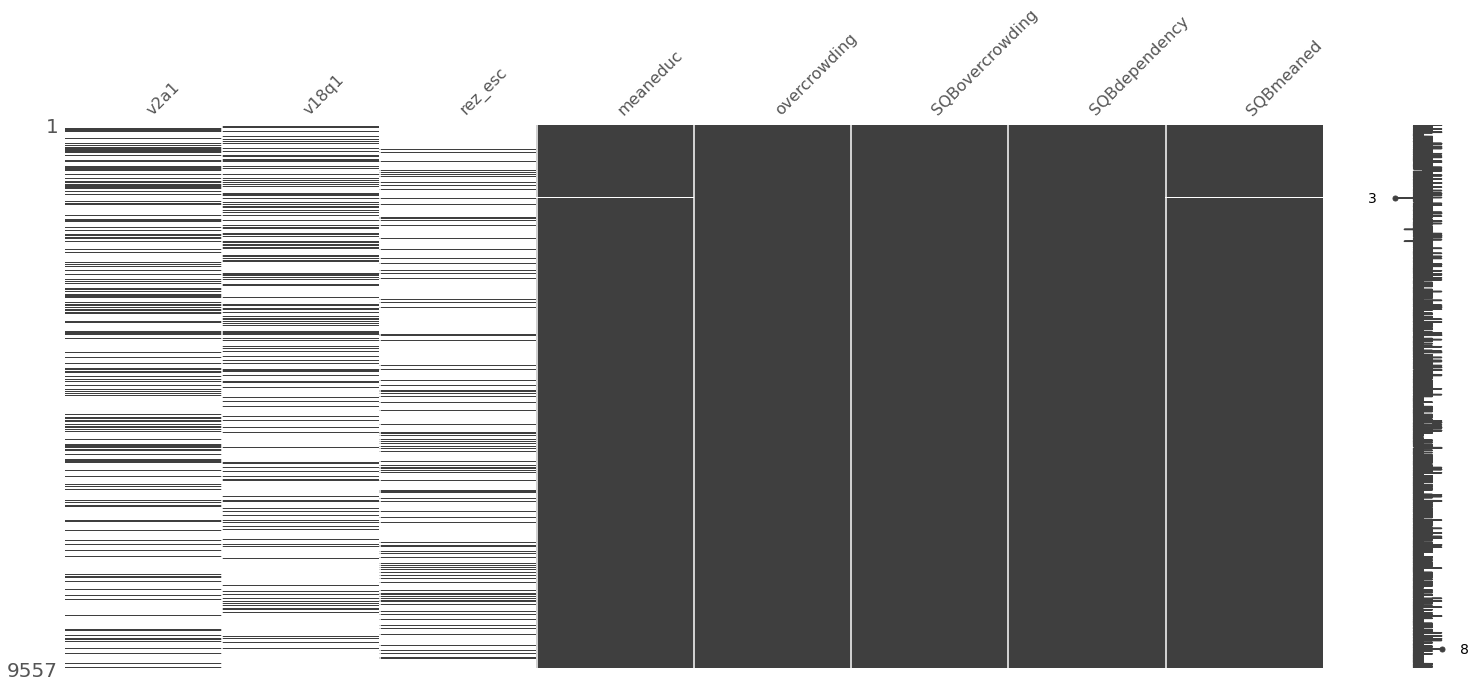

In [60]:
#Missing number plot and checking the type of missing values
from matplotlib import style
style.use('ggplot')
import missingno as msno
msno.bar(df_train.select_dtypes(np.float64))
msno.matrix(df_train.select_dtypes(np.float64))

v2a1,v18q1,rez_esc columns null values are missing completely at random

In [63]:
df_train.select_dtypes(np.object_)

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no
...,...,...,...,...,...
9552,ID_d45ae367d,d6c086aa3,.25,9,no
9553,ID_c94744e07,d6c086aa3,.25,9,no
9554,ID_85fc658f8,d6c086aa3,.25,9,no
9555,ID_ced540c61,d6c086aa3,.25,9,no


dependency, Dependency rate, calculated = (number of members of the household
younger than 19 or older than 64)/(number of member of household between 19 and 64)

edjefe, years of education of male head of household, based on the interaction of
escolari (years of education), head of household and gender, yes=1 and no=0

edjefa, years of education of female head of household, based on the interaction of
escolari (years of education), head of household and gender, yes=1 and no=0

In [68]:
df_train['dependency'].sample(10),df_train['edjefe'].sample(10)

(873      no
 6603     .5
 7573    yes
 6294     no
 2654    yes
 5150    yes
 4431     no
 4684    yes
 7014    yes
 4331     no
 Name: dependency, dtype: object,
 6677    16
 943     no
 8276     6
 457      6
 6576    no
 7071    11
 4193    no
 1575    no
 9347    10
 3248    no
 Name: edjefe, dtype: object)